Gradient Boost Regression is a powerful ensemble learning technique used for regression tasks, where the goal is to predict a continuous output (e.g., house prices, temperature, or sales). It builds an additive model by combining multiple weak learners, typically decision trees, in a sequential manner to minimize a specified loss function.

Step 1: Setup and Import Libraries


In [1]:
# Install necessary libraries
!pip install xgboost lightgbm catboost -q

# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.6 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Step 2: Create and Prepare the Dataset


Generates a synthetic dataset with 1,000 samples and 20 features.

In [2]:
# Generate synthetic regression dataset
X, y = make_regression(
    n_samples=1000, n_features=20, noise=0.1, random_state=42
)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Step 3: XGBoost Regressor

In [3]:
# Train XGBoost Regressor
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42
)
xgb_model.fit(X_train, y_train)

# Predictions and evaluation
# Predicts the target values for the test set using the trained XGBoost model.
y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Regressor Performance:")
print(f"Mean Squared Error: {mse_xgb:.2f}")
print(f"R^2 Score: {r2_xgb:.2f}")


XGBoost Regressor Performance:
Mean Squared Error: 3291.26
R^2 Score: 0.91


Step 4: LightGBM Regressor

In [4]:
# Train LightGBM Regressor
lgb_model = lgb.LGBMRegressor(
    n_estimators=100, learning_rate=0.1, max_depth=-1, random_state=42
)
lgb_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_lgb = lgb_model.predict(X_test)
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

print("\nLightGBM Regressor Performance:")
print(f"Mean Squared Error: {mse_lgb:.2f}")
print(f"R^2 Score: {r2_lgb:.2f}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007209 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4676
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 20
[LightGBM] [Info] Start training from score 2.698551
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

Step 5: CatBoost Regressor

In [5]:
# Train CatBoost Regressor
cat_model = CatBoostRegressor(verbose=0, random_state=42)
cat_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_cat = cat_model.predict(X_test)
mse_cat = mean_squared_error(y_test, y_pred_cat)
r2_cat = r2_score(y_test, y_pred_cat)

print("\nCatBoost Regressor Performance:")
print(f"Mean Squared Error: {mse_cat:.2f}")
print(f"R^2 Score: {r2_cat:.2f}")



CatBoost Regressor Performance:
Mean Squared Error: 1114.17
R^2 Score: 0.97


Step 6: Visualize Results

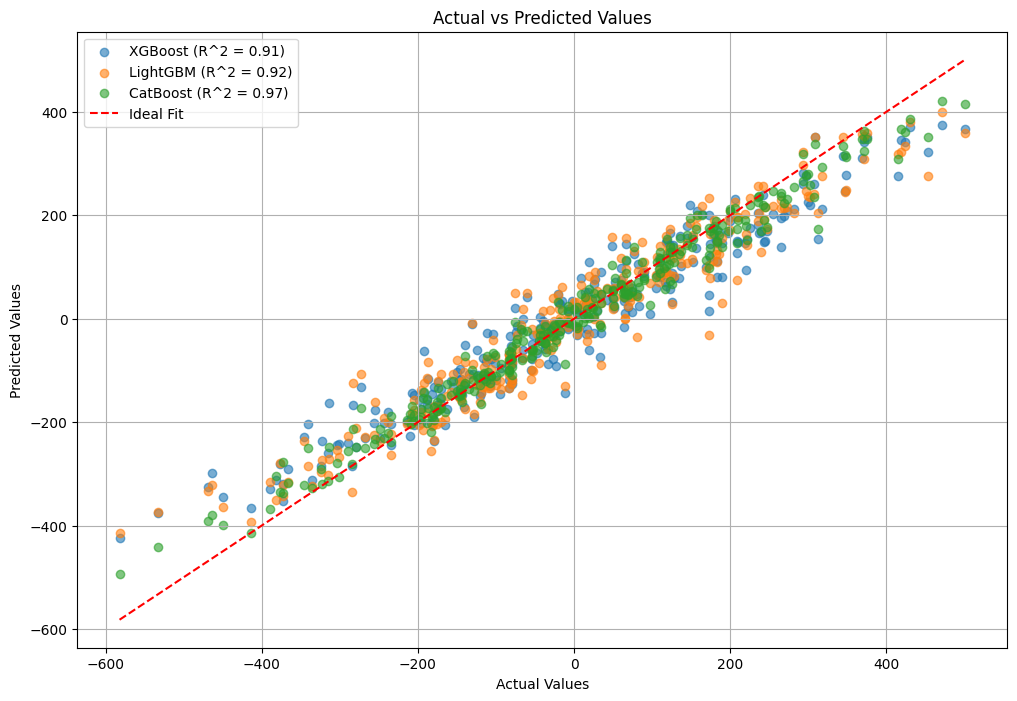

In [6]:
# Plot Actual vs Predicted for all models
plt.figure(figsize=(12, 8))

# XGBoost
plt.scatter(y_test, y_pred_xgb, alpha=0.6, label=f'XGBoost (R^2 = {r2_xgb:.2f})')

# LightGBM
plt.scatter(y_test, y_pred_lgb, alpha=0.6, label=f'LightGBM (R^2 = {r2_lgb:.2f})')

# CatBoost
plt.scatter(y_test, y_pred_cat, alpha=0.6, label=f'CatBoost (R^2 = {r2_cat:.2f})')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.show()


* Plots scatter points for actual vs. predicted values for each model.
* The closer the points are to the diagonal line (ideal fit), the better the model.
* Adds a diagonal line as a reference for perfect predictions.